In [8]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#数据处理

#获取通道i的数据
def getChanelData(data,i):
    chanel_data=[]
    for j in range(len(data)):
        chanel_data.append(data[j][i])
    return chanel_data

#获取一个样本的所有通道
def getSampleData(file_name):
    f=open(file_name)
    data=np.loadtxt(f)
    sample_data=[]
    for i in range(len(data[1])):
        sample_data.append(getChanelData(data,i))
    f.close()
    return sample_data

#获取一个个体的所有样本数据
def getSubjectData(i):
    subject_data=[]
    subject_data.append(getSampleData(getFileName(str(i),'happyC')))
    subject_data.append(getSampleData(getFileName(str(i),'sadC')))
    return subject_data
    
#获取对应的文件名
def getFileName(i,type):
    file_name='data/'+i+'_'+type+'.txt'
    return file_name

In [3]:
#特征提取

#PSD功率谱密度
#获取一个通道的PSD,(δ（1－3Hz）、θ（3－8Hz）、α（8－12Hz）、β（12－30Hz）,gamma(30-50Hz))
def getPsdChanel(chanel_data):
    power,freqs= plt.psd(chanel_data, len(P),Fs=100, scale_by_freq=0)
    delta_data=[]
    thta_data=[]
    alpha_data=[]
    beta_data=[]
    gamma_data=[]
    #根据freqs的值将每个波段的PSD加和平均
    for i in range(len(freqs)):
        if freqs[i]>=1 and freqs[i]<=3:
            delta_data.append(power[i])
        elif freqs[i]>3 and freqs[i]<=8:
            thta_data.append(power[i])
        elif freqs[i]>8 and freqs[i]<=12:
            alpha_data.append(power[i])
        elif freqs[i]>12 and freqs[i]<30:
            beta_data.append(power[i])
        elif freqs[i]>30 and freqs[i]<=50:
            gamma_data.append(power[i])
    #求平均
    return np.mean(delta_data),np.mean(thta_data),np.mean(alpha_data),np.mean(beta_data),np.mean(gamma_data)

#获取一个样本的指定通道的PSD值,index缺省为全部通道,isMean表示是否取均值
def getPsdSample(sample_data,index=-1,isMean=False):
    deltas=[]
    thtas=[]
    alphas=[]
    betas=[]
    gammas=[]
    if index==-1:
        index=range(len(sample_data))
    for i in index:
        delta,thta,alpha,beta,gamma=getPsdChanel(sample_data[i])
        deltas.append(delta)
        thtas.append(thta)
        alphas.append(alpha)
        betas.append(beta)
        gammas.append(gamma)
    if isMean:
        return np.mean(deltas),np.mean(thtas),np.mean(alphas),np.mean(betas),np.mean(gammas)
    else:
        return [deltas,thtas,alphas,betas,gammas]
        
        
        

In [ ]:
#降维
#t-SNE
TSNE(learning_rate=1000)

In [4]:
#获取所有的个体的数据,[0,1]0为开心一致的数据,[0~68]各个通道的数据
subjects=[]
for i in range(42):
    subjects.append(getSubjectData(i+1))


(4.409473464292699,
 0.07454676275606008,
 0.038270335308027585,
 0.0009450530702335942,
 1.8188995740140372e-09)

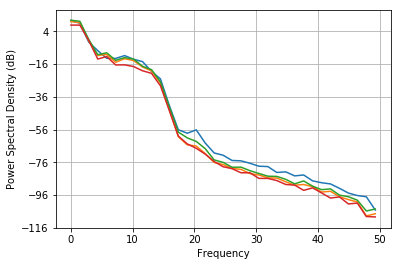

In [6]:
P=subjects[0][0]
getPsdSample(P,index=[0,2,3,6],isMean=True)

(2.544638727427152,
 0.057243993871982424,
 0.02265012359816315,
 0.0009672218857702171,
 1.7617761338430563e-09)

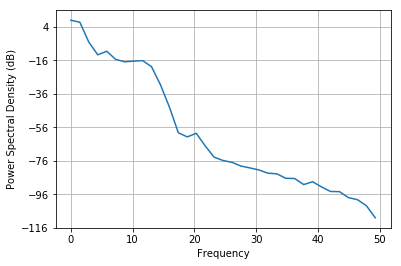

In [30]:
P

[1.6002134,
 1.3741753,
 1.0052163,
 0.54658209,
 0.076293216,
 -0.32261832,
 -0.58559254,
 -0.6894977,
 -0.66309727,
 -0.57679373,
 -0.51218828,
 -0.52543428,
 -0.62152443,
 -0.75056005,
 -0.82925513,
 -0.77841742,
 -0.56140284,
 -0.20976885,
 0.17997157,
 0.48536017,
 0.61725633,
 0.5700076,
 0.43048777,
 0.33642475,
 0.40416303,
 0.66367547,
 1.0337313,
 1.3531652,
 1.4568401,
 1.2616053,
 0.81656478,
 0.28532412,
 -0.13270769,
 -0.3007625,
 -0.20723122,
 0.040494302,
 0.2847674,
 0.40605801,
 0.38136191,
 0.28498385,
 0.23636624,
 0.32476853,
 0.55611986,
 0.85097198,
 1.0902985,
 1.1809273,
 1.1009048,
 0.89908039,
 0.65422886,
 0.42690261,
 0.23608486,
 0.067694862,
 -0.097419085,
 -0.25875816,
 -0.39214409,
 -0.46356125,
 -0.4524092,
 -0.36821305,
 -0.2475465,
 -0.13110259,
 -0.036745078,
 0.049690652,
 0.16139802,
 0.32321464,
 0.52917186,
 0.74208488,
 0.91248381,
 1.0015152,
 0.99260624,
 0.89024457,
 0.71458075,
 0.49536841,
 0.2693055,
 0.079663781,
 -0.025658539,
 -0.00351

NameError: name 'P' is not defined

'   1.4632920e+00   1.6002134e+00   1.6706844e+00   1.7615749e+00   1.2462297e-01   1.7323698e+00   2.0255635e+00   7.9133186e-01   1.9794754e+00   2.1508844e+00   1.6019032e+00   1.6857375e+00   2.1116285e+00   1.2019478e+00   6.8762599e-01   9.2489177e-01   5.4934327e-01   4.3262373e-01   1.8316584e-01   2.2149668e-01   1.1819204e+00  -9.2503936e-02   8.1893989e-02   1.3981631e-01   1.1738582e+00  -6.6054110e-01  -5.2757972e-01   3.0334793e-02   1.8891138e-01  -8.0390505e-01  -8.0367731e-01  -8.7550594e-01  -1.1657536e+00   3.4566261e-01  -4.2881080e-01  -1.1456048e+00  -1.2734800e+00  -1.2684678e+00  -2.0915096e+00  -2.2762153e+00  -1.1749022e+00  -2.3066533e+00  -1.6538853e+00  -2.1194863e+00  -1.8933522e+00  -2.3238111e+00  -6.5962464e-01   4.1906651e-01  -2.1039492e+00  -3.3306977e-01   6.4011465e-02  -2.4346427e+00  -1.7843219e+00  -1.0731727e+00  -1.9740384e-01  -9.8467200e-02  -9.0435920e-02   8.2075511e-01   1.0292431e+00   6.4393561e-01   1.2945826e+00   1.1109436e+00   8.43